In [1]:
import pandas as pd

# Load the data
file_path = 'loan.csv'
loan_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
loan_data.head()

C:\Users\Star\AppData\Local\Temp\ipykernel_6188\2536536162.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# Shape of the data
data_shape = loan_data.shape

print(data_shape)

# Number of null values per column
null_values = loan_data.isnull().sum()
print(null_values)

(39717, 111)
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [3]:
# Calculate the percentage of null values for each column
null_values_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

# Sort the columns by the percentage of null values
null_values_sorted = null_values_percentage.sort_values(ascending=False)

null_values_sorted

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [4]:
# Convert the Series to a DataFrame
null_values_sorted_df = null_values_sorted.reset_index()
null_values_sorted_df.columns = ['Column', 'Null Values %']

# Path to save the csv file
null_values_csv_path = 'null_values_sorted.csv'

# Write to a csv file
null_values_sorted_df.to_csv(null_values_csv_path, index=False)

null_values_csv_path


'null_values_sorted.csv'

In [5]:
# Remove columns that have 100% null values
loan_data_cleaned = loan_data.drop(columns=null_values_sorted[null_values_sorted == 100.0].index)

# Display the shape of the new dataframe and a few rows to confirm
loan_data_cleaned_shape = loan_data_cleaned.shape
loan_data_cleaned.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


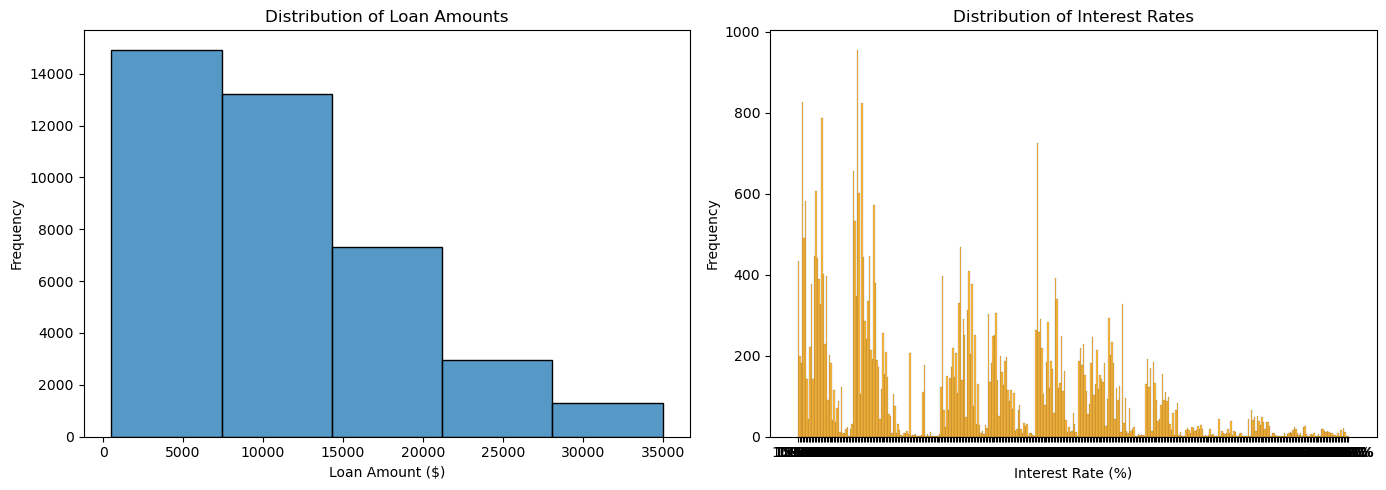

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for loan amounts
sns.histplot(loan_data_cleaned['loan_amnt'], bins=5, ax=axes[0])
axes[0].set_title('Distribution of Loan Amounts')
axes[0].set_xlabel('Loan Amount ($)')
axes[0].set_ylabel('Frequency')

# Histogram for interest rates
sns.histplot(loan_data_cleaned['int_rate'], bins=10, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Interest Rates')
axes[1].set_xlabel('Interest Rate (%)')
axes[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


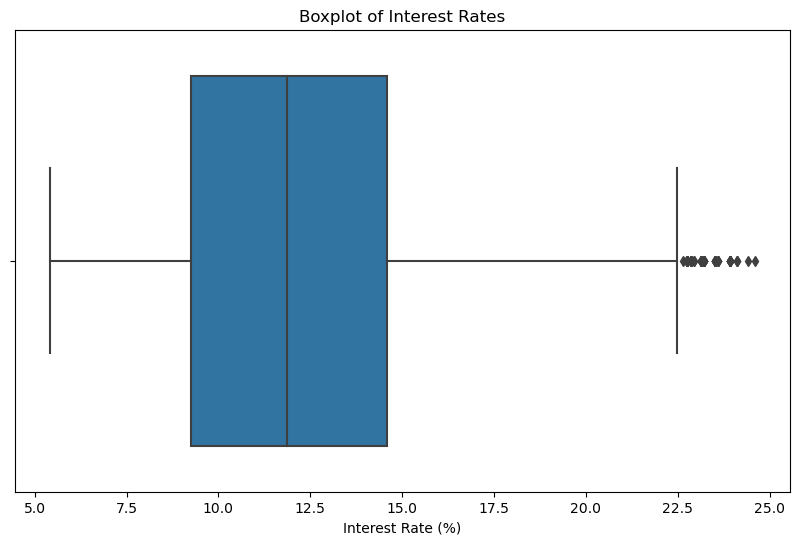

In [7]:
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float')

# Boxplot for interest rates
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_data_cleaned['int_rate'])
plt.title('Boxplot of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.show()

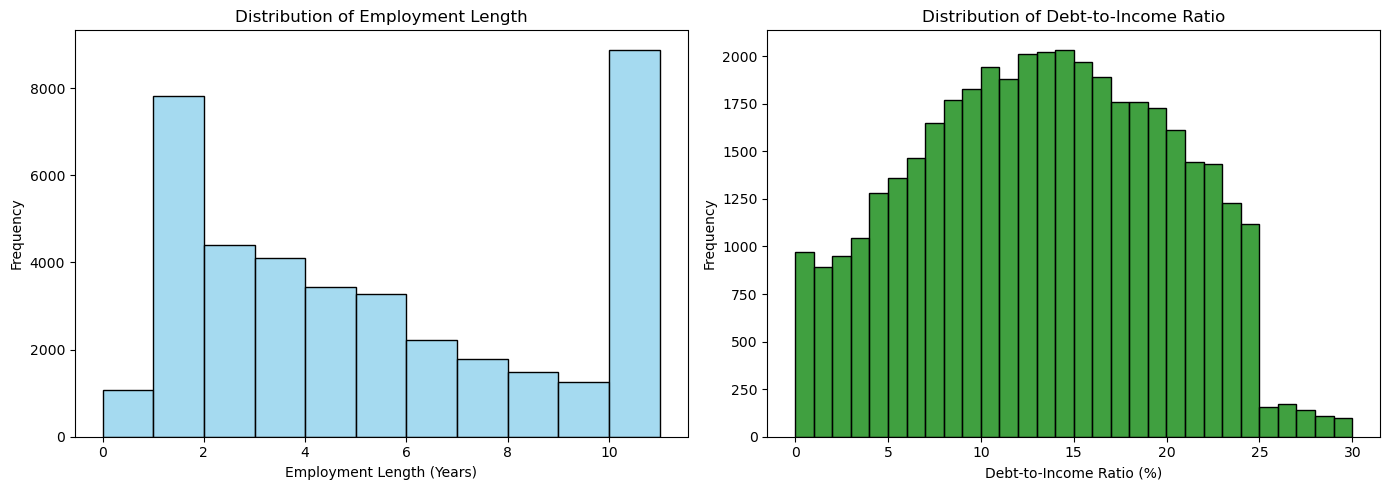

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean 'emp_length' to be more uniform and fill NaN values with 0 for plotting
loan_data_cleaned['emp_length_clean'] = loan_data_cleaned['emp_length'].str.extract('(\d+)').fillna(0).astype(int)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Employment Length
sns.histplot(loan_data_cleaned['emp_length_clean'], bins=range(0, 12), ax=axes[0], kde=False, color='skyblue')
axes[0].set_title('Distribution of Employment Length')
axes[0].set_xlabel('Employment Length (Years)')
axes[0].set_ylabel('Frequency')

# Histogram for Debt-to-Income Ratio
sns.histplot(loan_data_cleaned['dti'], bins=30, ax=axes[1], kde=False, color='green')
axes[1].set_title('Distribution of Debt-to-Income Ratio')
axes[1].set_xlabel('Debt-to-Income Ratio (%)')
axes[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
# Find the unique values in the 'loan_status' column
unique_loan_status = loan_data_cleaned['loan_status'].unique()
unique_loan_status

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

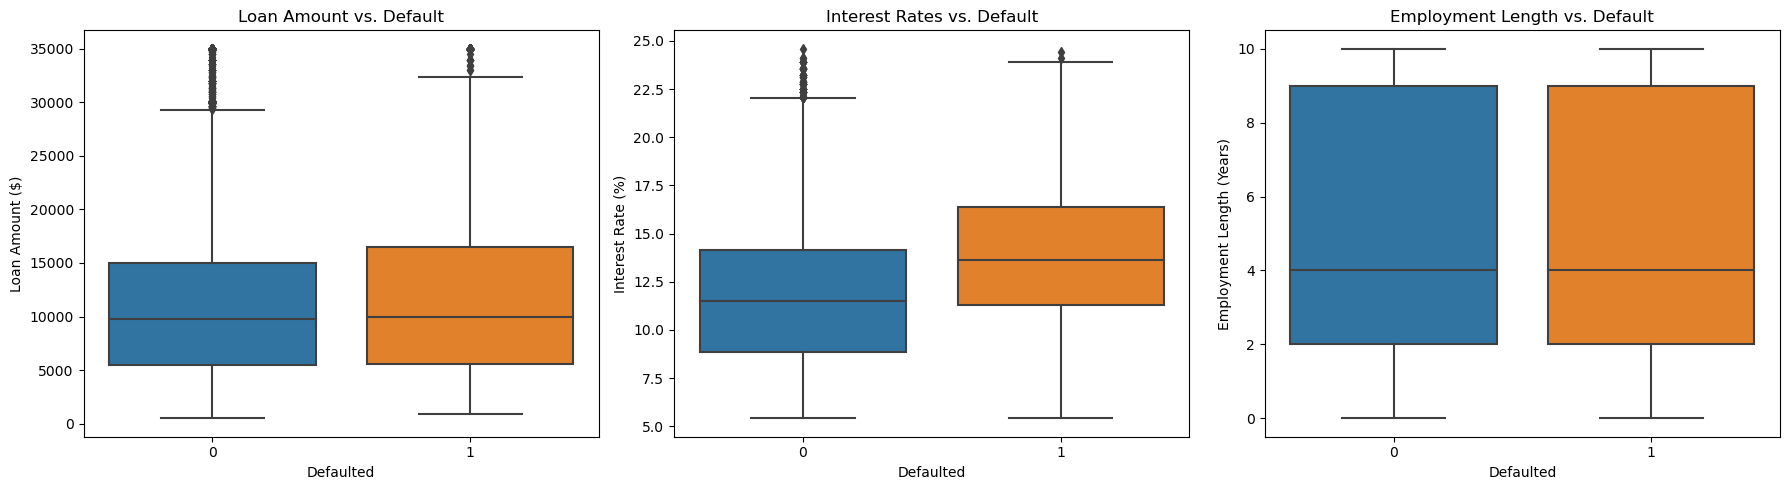

In [10]:
# We will create a new column 'defaulted' to indicate whether the loan is in default.

# Define the default status
#default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']
default_statuses = ['Charged Off']

# Create a new column where 1 represents a default and 0 represents non-default.
loan_data_cleaned['defaulted'] = loan_data_cleaned['loan_status'].isin(default_statuses).astype(int)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bivariate analysis of Loan Amount vs. Default
sns.boxplot(x='defaulted', y='loan_amnt', data=loan_data_cleaned, ax=axes[0])
axes[0].set_title('Loan Amount vs. Default')
axes[0].set_xlabel('Defaulted')
axes[0].set_ylabel('Loan Amount ($)')

# Bivariate analysis of Interest Rates vs. Default
sns.boxplot(x='defaulted', y='int_rate', data=loan_data_cleaned, ax=axes[1])
axes[1].set_title('Interest Rates vs. Default')
axes[1].set_xlabel('Defaulted')
axes[1].set_ylabel('Interest Rate (%)')

# Bivariate analysis of Employment Length vs. Default
sns.boxplot(x='defaulted', y='emp_length_clean', data=loan_data_cleaned, ax=axes[2])
axes[2].set_title('Employment Length vs. Default')
axes[2].set_xlabel('Defaulted')
axes[2].set_ylabel('Employment Length (Years)')

# Show the plot
plt.tight_layout()
plt.show()


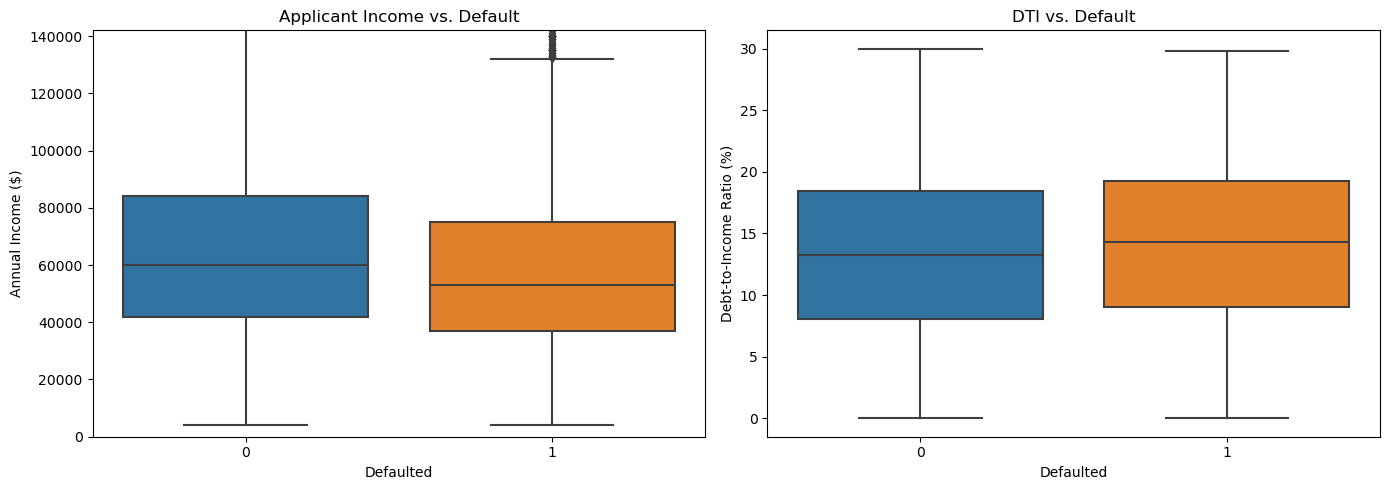

In [11]:
# Plotting Applicant Income vs. Default and DTI vs. Default

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bivariate analysis of Annual Income vs. Default
sns.boxplot(x='defaulted', y='annual_inc', data=loan_data_cleaned, ax=axes[0])
axes[0].set_title('Applicant Income vs. Default')
axes[0].set_xlabel('Defaulted')
axes[0].set_ylabel('Annual Income ($)')

# Since annual income can have outliers that may distort the plot, we'll limit the y-axis for a better view
axes[0].set_ylim(0, loan_data_cleaned['annual_inc'].quantile(0.95))

# Bivariate analysis of DTI vs. Default (similar to Credit Score)
sns.boxplot(x='defaulted', y='dti', data=loan_data_cleaned, ax=axes[1])
axes[1].set_title('DTI vs. Default')
axes[1].set_xlabel('Defaulted')
axes[1].set_ylabel('Debt-to-Income Ratio (%)')

# Show the plot
plt.tight_layout()
plt.show()


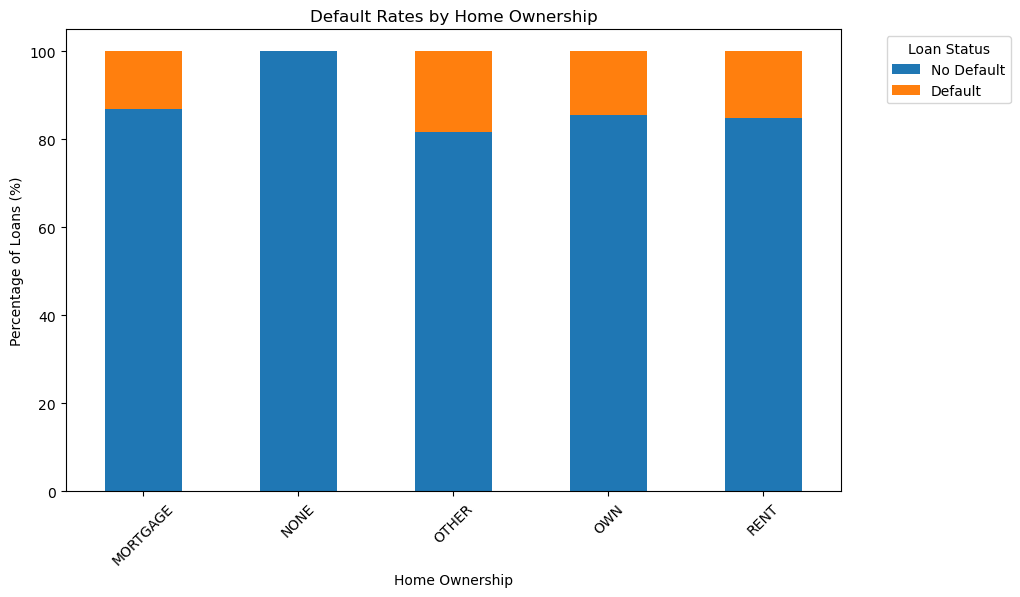

defaulted,No Default,Default
home_ownership,,
MORTGAGE,86.822583,13.177417
NONE,100.000000,NaN
OTHER,81.632653,18.367347
OWN,85.513407,14.486593
RENT,84.978041,15.021959


In [12]:
# Calculate the default rates for each category of home ownership
home_ownership_default_rate = loan_data_cleaned.groupby('home_ownership')['defaulted'].value_counts(normalize=True).unstack()
home_ownership_default_rate = home_ownership_default_rate.multiply(100).rename(columns={0: 'No Default', 1: 'Default'})

# Plot the default rates for each category of home ownership
home_ownership_default_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Default Rates by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage of Loans (%)')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

home_ownership_default_rate

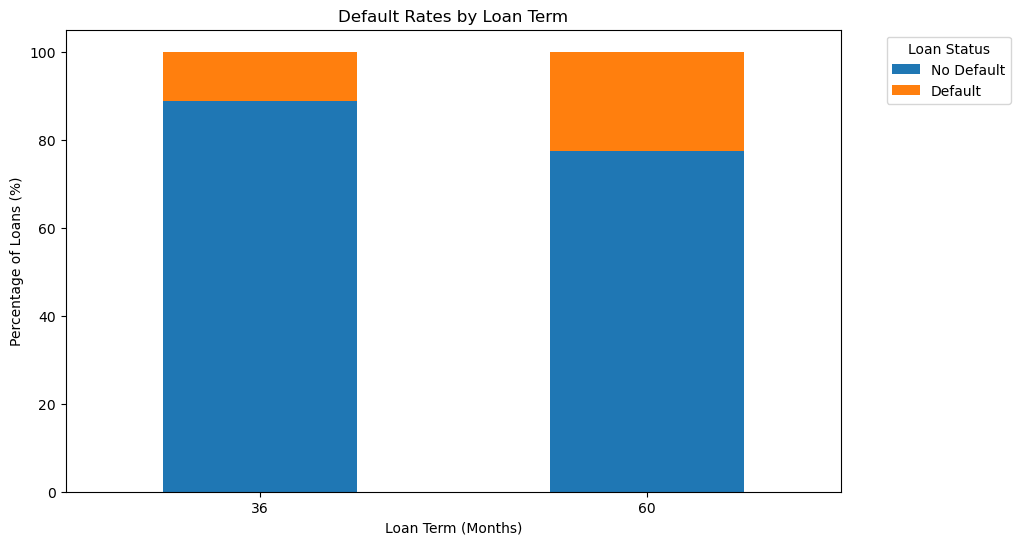

defaulted,No Default,Default
term_months,,
36,88.909128,11.090872
60,77.403258,22.596742


In [14]:
# Create term_months column from term column
loan_data_cleaned['term_months'] = loan_data_cleaned['term'].str.extract('(\d+)').astype(int)

# Calculate the default rates for each loan term category
loan_term_default_rate = loan_data_cleaned.groupby('term_months')['defaulted'].value_counts(normalize=True).unstack()
loan_term_default_rate = loan_term_default_rate.multiply(100).rename(columns={0: 'No Default', 1: 'Default'})

# Plot the default rates for each loan term category
loan_term_default_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Default Rates by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Percentage of Loans (%)')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

loan_term_default_rate

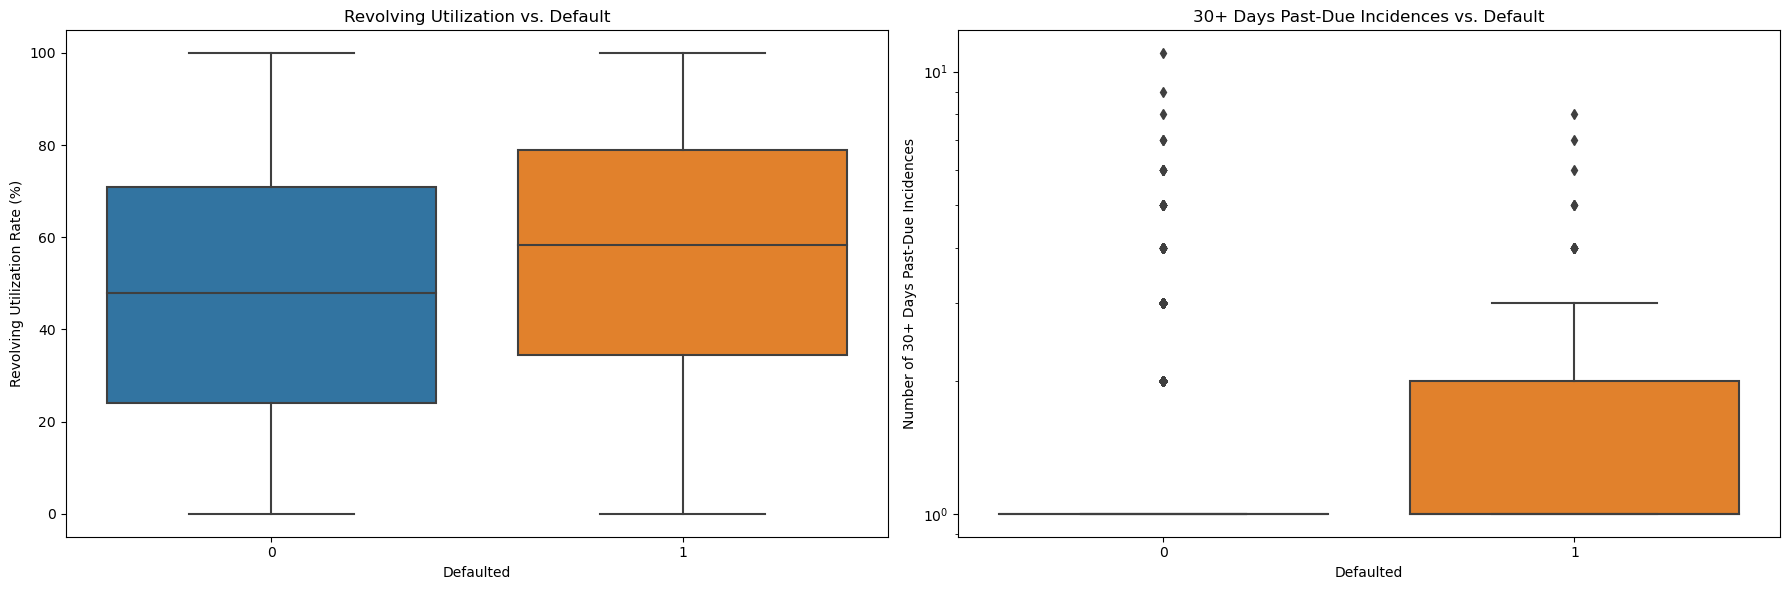

In [19]:
# For the 'revol_util' column, we need to convert it to a numeric format by removing the '%' sign and converting to float
loan_data_cleaned['revol_util_cleaned'] = loan_data_cleaned['revol_util'].str.rstrip('%').astype('float')

# Set up the matplotlib figure for Bivariate analysis of revol_util and delinq_2yrs vs Default
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bivariate analysis of Revolving Line Utilization Rate (revol_util) vs. Default
sns.boxplot(x='defaulted', y='revol_util_cleaned', data=loan_data_cleaned, ax=axes[0])
axes[0].set_title('Revolving Utilization vs. Default')
axes[0].set_xlabel('Defaulted')
axes[0].set_ylabel('Revolving Utilization Rate (%)')

# Bivariate analysis of Number of 30+ Days Past-Due Incidences (delinq_2yrs) vs. Default
sns.boxplot(x='defaulted', y='delinq_2yrs', data=loan_data_cleaned[loan_data_cleaned['delinq_2yrs'] > 0], ax=axes[1])
axes[1].set_title('30+ Days Past-Due Incidences vs. Default')
axes[1].set_xlabel('Defaulted')
axes[1].set_yscale('log')  # Using a log scale
axes[1].set_ylabel('Number of 30+ Days Past-Due Incidences')

# Show the plot
plt.tight_layout()
plt.show()
